<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-корректности-расчета-эффективности-обогращения" data-toc-modified-id="Проверка-корректности-расчета-эффективности-обогращения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка корректности расчета эффективности обогращения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#DummyRegressor-(Простая-модель)" data-toc-modified-id="DummyRegressor-(Простая-модель)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>DummyRegressor (Простая модель)</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Lasso</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Ridge</a></span></li><li><span><a href="#Catboost-(Градиентный-бустинг)" data-toc-modified-id="Catboost-(Градиентный-бустинг)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Catboost (Градиентный бустинг)</a></span></li><li><span><a href="#Decision-Tree-Regressor-(Регрессор-дерева-решения)" data-toc-modified-id="Decision-Tree-Regressor-(Регрессор-дерева-решения)-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Decision Tree Regressor (Регрессор дерева решения)</a></span></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

In [1]:
# загрузка библиотек
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Lasso 
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [2]:
# чтение файла с данными и сохранение в переменные
# данные индексируются датой и временем получения информации (признак date)
try:
    df = pd.read_csv('C:/Users/79853/Documents/datascience/yandex/Сборный проект2/gold_recovery_full_new.csv',
                     index_col='date')
    test = pd.read_csv('C:/Users/79853/Documents/datascience/yandex/Сборный проект2/gold_recovery_test_new.csv',
                     index_col='date')
    train = pd.read_csv('C:/Users/79853/Documents/datascience/yandex/Сборный проект2/gold_recovery_train_new.csv',
                     index_col='date')
except:
    df = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date') # загрузка онлайн
    test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date') # загрузка онлайн
    train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date') # загрузка онлайн

In [3]:
# размер таблиц (строки, колонки)
data = [df, train, test]
for dataset in data:
    print(dataset.shape)
    print()

(19439, 86)

(14149, 86)

(5290, 52)



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,19438.0,5.168470,1.372348,0.000000,4.251240,5.066094,5.895527,16.001945
final.output.concentrate_pb,19438.0,9.978895,1.669240,0.000000,9.137262,10.102433,11.035769,17.031899
final.output.concentrate_sol,19228.0,9.501224,2.787537,0.000000,7.722820,9.218961,10.947813,19.615720
final.output.concentrate_au,19439.0,44.076513,5.129784,0.000000,43.402215,45.011244,46.275313,52.756638
final.output.recovery,19439.0,67.050208,10.125840,0.000000,63.299712,68.172738,72.686642,100.000000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,19438.0,-488.684065,34.533396,-797.323986,-500.458467,-499.802605,-498.384187,-244.483566
secondary_cleaner.state.floatbank5_b_air,19438.0,12.198224,5.333024,0.528083,8.971105,11.019433,14.019088,27.926001
secondary_cleaner.state.floatbank5_b_level,19438.0,-487.149827,38.347312,-800.220337,-500.129462,-499.935317,-499.436708,-137.740004
secondary_cleaner.state.floatbank6_a_air,19437.0,18.959024,5.550498,-0.079426,14.983037,19.960541,24.003170,32.188906


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
final.output.concentrate_ag,14148.0,5.142034,1.369586,0.000000,4.211620,4.994652,5.859540,16.001945
final.output.concentrate_pb,14148.0,10.132960,1.654930,0.000000,9.297355,10.297144,11.170603,17.031899
final.output.concentrate_sol,13938.0,9.202849,2.790516,0.000000,7.484645,8.845462,10.487508,18.124851
final.output.concentrate_au,14149.0,44.003792,4.905261,0.000000,43.276111,44.872436,46.166425,52.756638
final.output.recovery,14149.0,66.518832,10.295402,0.000000,62.545817,67.432775,72.346428,100.000000
...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,14148.0,-483.956022,37.892788,-797.142475,-500.363177,-499.702452,-487.712108,-275.073125
secondary_cleaner.state.floatbank5_b_air,14148.0,13.064590,5.765617,0.646208,8.994405,11.997547,17.982903,27.926001
secondary_cleaner.state.floatbank5_b_level,14148.0,-483.966564,39.207913,-800.006180,-500.105994,-499.914556,-453.186936,-157.396071
secondary_cleaner.state.floatbank6_a_air,14147.0,19.577539,5.764417,0.195324,14.989304,19.984175,24.991623,32.188906


In [9]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
primary_cleaner.input.sulfate,5286.0,174.839652,43.027080,2.566156e+00,147.121401,177.828489,208.125438,265.983123
primary_cleaner.input.depressant,5285.0,8.683596,3.072050,3.839482e-03,6.489555,8.052207,10.027764,40.000000
primary_cleaner.input.feed_size,5290.0,7.266339,0.610219,5.650000e+00,6.890000,7.250000,7.600000,15.500000
primary_cleaner.input.xanthate,5286.0,1.383803,0.643474,4.983673e-03,0.907623,1.197610,1.797819,4.102454
primary_cleaner.state.floatbank8_a_air,5290.0,1539.494325,116.797884,5.445860e-32,1498.935802,1585.129123,1602.076529,2103.103580
primary_cleaner.state.floatbank8_a_level,5290.0,-497.665883,19.952431,-7.953163e+02,-500.357298,-499.969164,-499.568951,-57.195404
primary_cleaner.state.floatbank8_b_air,5290.0,1545.174232,122.224588,6.647490e-32,1498.970993,1595.621798,1602.323545,1813.083671
primary_cleaner.state.floatbank8_b_level,5290.0,-500.273098,32.968307,-7.999970e+02,-500.703002,-500.028514,-499.293257,-142.527229
primary_cleaner.state.floatbank8_c_air,5290.0,1527.272362,122.538034,4.033736e-32,1473.229862,1549.594682,1601.143775,1715.053773
primary_cleaner.state.floatbank8_c_level,5290.0,-498.330680,21.964876,-7.999606e+02,-501.018117,-500.017711,-498.994130,-150.937035


In [10]:
df.head(3)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [11]:
train.head(3)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [12]:
test.head(3)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


In [13]:
# подсчёт явных дубликатов
for dataset in data:
    print(dataset.duplicated().sum())

0
0
0


**Вывод:**

В таблицах **df** и **train** по 86 полей, в таблице **test** - 52 поля. 

Индекс `date` (дата) - тип *object*. Остальные поля - это количественные признаки, тип *float64*.

Во всех таблицах присутствуют пропуски данных.

Дубликаты не выявлены.

### Проверка корректности расчета эффективности обогращения

Эффективность обогащения рассчитывается по формуле:

$$
Recovery = \frac{ C × (F - T) }{ F × (C - T) } × 100\text{%}
$$

где:
- $C$ — доля золота в концентрате после флотации/очистки;
- $F$ — доля золота в сырье/концентрате до флотации/очистки;
- $T$ — доля золота в отвальных хвостах после флотации/очистки.

In [14]:
# функция для расчета эффективности обогращения Recovery
def recovery(data):
    C = data['rougher.output.concentrate_au']
    F = data['rougher.input.feed_au']
    T = data['rougher.output.tail_au']
    return (C*(F-T)) / (F*(C-T)) * 100

Добавим в датасет **df** поле `recovery` со значением эффективности обогращения, рассчитанным по формуле.

Затем для определения корректности значений эффективность обогращения в исходных данных рассчитаем **среднюю абсолютную ошибку MAE** между значениями `recovery` (эффективность обогращения, рассчитанная по формуле) и значениями `rougher.output.recovery` (эффективность обогращения из исходных данных).

In [15]:
df['recovery'] = df.apply(recovery, axis=1)
df.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794


In [16]:
# MAE
mean_absolute_error(df['rougher.output.recovery'], df['recovery'])

9.874045668302637e-15

**Вывод:**

Значение ошибки MAE очень мало, можно сделать вывод, что **эффективность обогращения в исходных данных рассчитана корректно.**

### Анализ признаков, недоступных в тестовой выборке

Добавим в список **extra_features** наименования полей из датасета **train**, которые отсутствуют в датасете **test**. 

In [17]:
extra_features = []
for column in train.columns:
    if column not in test.columns:
        extra_features.append(column)
print('Количество недостающих полей в test:', len(extra_features))

Количество недостающих полей в test: 34


In [18]:
extra_features

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

**Наименование признаков**

**[этап].[тип_параметра].[название_параметра]**

Пример: rougher.input.feed_ag

Возможные значения для блока **[этап]**:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока **[тип_параметра]**:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

**Вывод:**

В тестовой выборке недоступны следующие поля:
- расчётные характеристики для флотации,
- параметры продукта (чернового концентрата и отвальных хвостов) для всех этапов процесса: флотации, первичной очистки, вторичной очистки,
- финальные характеристики концентрата и отвальных хвостов,
- эффективность обогращения.

## Предобработка данных

Добавим в датасет **test** недостающие целевые признаки - эффективность обогащения `rougher.output.recovery`, `final.output.recovery`.

Остальные признаки, которые отсутствуют в **test**, удалим из датасета **train**.

In [19]:
test = test.join(df[['rougher.output.recovery', 'final.output.recovery']], how='left')
test.head(3)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213


In [20]:
for column in train.columns:
    if column not in test.columns:
        train = train.drop([column], axis=1)
print(test.shape)
print(train.shape)

(5290, 54)
(14149, 54)


## Анализ данных

Посмотрим, как меняется концентрация металлов на различных этапах очистки.
- **Au** - золото,
- **Ag** - серебро,
- **Pb** - свинец.

In [21]:
# функция для построения диаграммы размаха концентрации золота на различных этапах очистки
def boxplot_concentrate(metal, title):
    concentrate = df[[f'rougher.output.concentrate_{metal}',
                      f'primary_cleaner.output.concentrate_{metal}',
                      f'final.output.concentrate_{metal}']].stack().reset_index()
    concentrate.columns = ['date', 'stage', 'concentrate']
    concentrate.loc[concentrate.stage == f'rougher.output.concentrate_{metal}', 'stage'] = 'флотация'
    concentrate.loc[concentrate.stage == f'primary_cleaner.output.concentrate_{metal}', 'stage'] = 'первичная очистка'
    concentrate.loc[concentrate.stage == f'final.output.concentrate_{metal}', 'stage'] = 'вторичная очистка'
    
    # построение графика
    plt.figure(figsize=(15,8))
    sns.set(style='darkgrid')
    ax = sns.boxplot(x="stage", y="concentrate", data=concentrate, color='turquoise')
    plt.title(title, fontsize=14, weight='bold');
    plt.xlabel('этапы очистки сырья', fontsize=14);
    plt.ylabel('концентрация вещества', fontsize=14);  

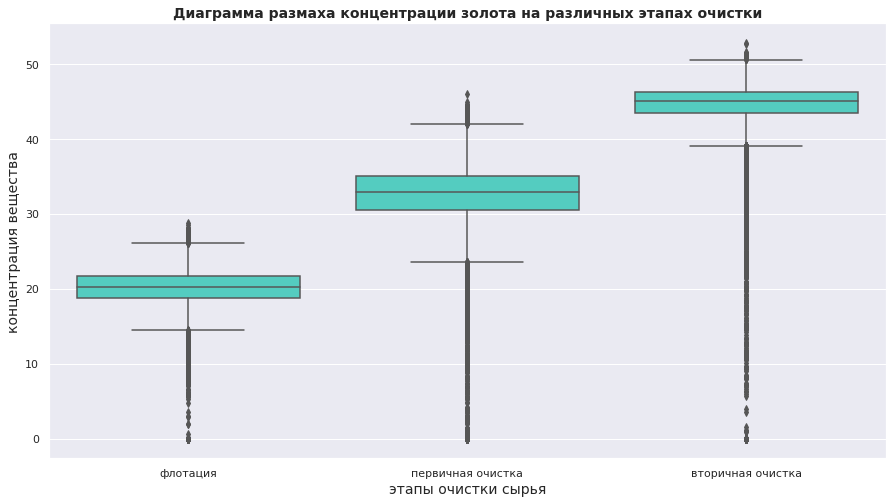

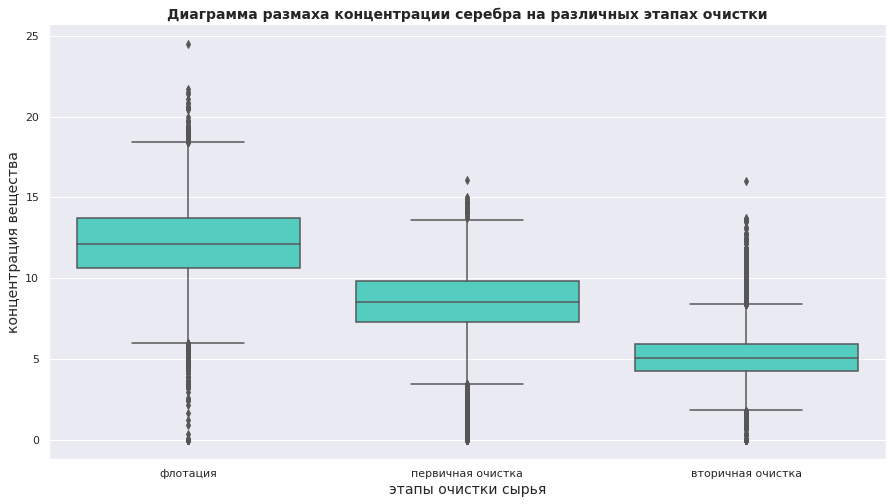

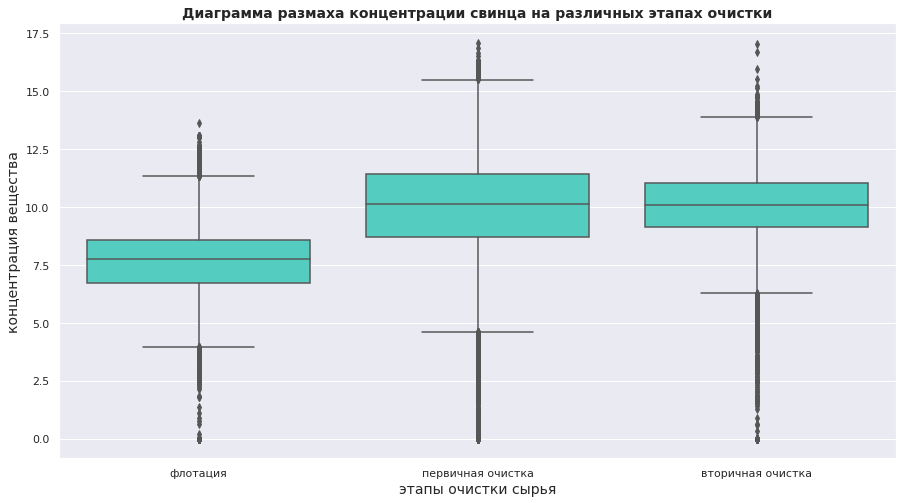

In [22]:
boxplot_concentrate(metal='au', title="Диаграмма размаха концентрации золота на различных этапах очистки")
boxplot_concentrate(metal='ag', title="Диаграмма размаха концентрации серебра на различных этапах очистки")
boxplot_concentrate(metal='pb', title="Диаграмма размаха концентрации свинца на различных этапах очистки")

Концентрации металлов (золота, серебра и свинца) изменяется на каждом этапе очистки:
- концентрация **золота** увеличивается после каждого этапа. **Средняя концентрация** на этапах флотации, первичной и вторичной очистки составляет соответственно: **20, 33, 45**;
- концентрация **серебра** уменьшается после каждого этапа. **Средняя концентрация** составляет соответственно: **12, 8, 5**;
- концентрация **свинца** увеличивается после первичной очистки и почти не изменяется после вторичной. **Средняя концентрация** составляет соответственно: **8, 10, 10**;

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Чтобы оценка модели была правильной, распределения не должны сильно отличаться друг от друга.

In [23]:
# функция для построения гистограммы распределения размера гранул сырья
def histogram_feed_size(stage, title):
    a = pd.concat(axis=0, ignore_index=True,
                  objs=[pd.DataFrame.from_dict({'value': test[f'{stage}.input.feed_size'], 'Выборка': 'test'}),
                        pd.DataFrame.from_dict({'value': train[f'{stage}.input.feed_size'], 'Выборка': 'train'})])
    plt.figure(figsize=(15,8))
    sns.set(style='darkgrid')
    sns.histplot(data=a, x="value", hue="Выборка")
    plt.title(title, fontsize=14, weight='bold');
    plt.xlabel('размеры гранул', fontsize=14);
    plt.ylabel('частота', fontsize=14);   

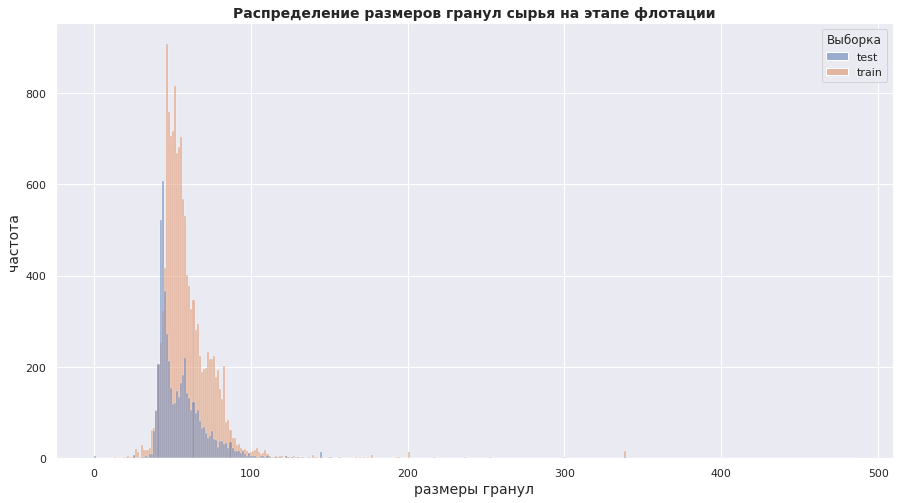

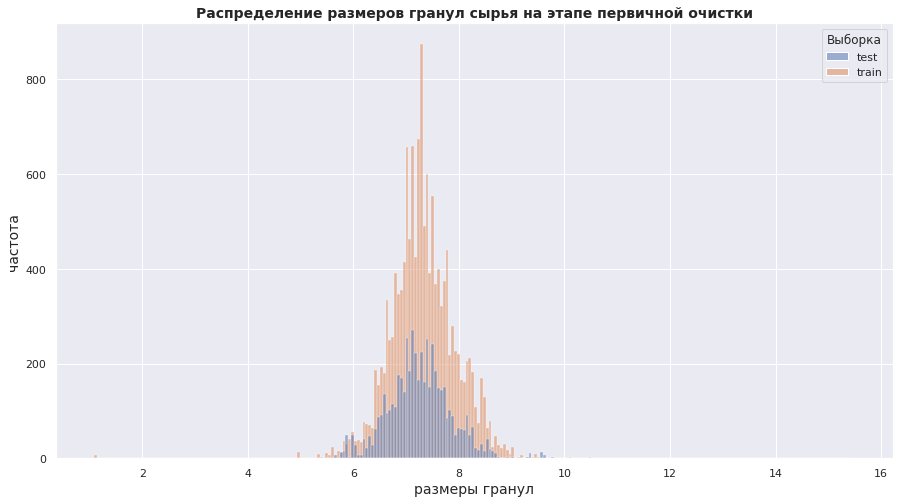

In [24]:
histogram_feed_size(stage='rougher', title='Распределение размеров гранул сырья на этапе флотации')
histogram_feed_size(stage='primary_cleaner', title='Распределение размеров гранул сырья на этапе первичной очистки')

Гистограммы распределения размеров гранул сырья на этапе **флотации** отличаются между собой и довольно сильно отличаются от нормального распределения. Но, в целом, размеры большинства частиц лежат в оптимальном для флотации интервале 40—100 мкм.

По виду гистограмм распределение размеров гранул сырья на этапе **первичной очистки** можно сказать, что распределения почти не отличаются друг от друга и близки к нормальному распределению.

Т.о. можно сделать вывод, что **выборки подходят для оценки.**

Исследуем **суммарную концентрацию всех веществ** на разных стадиях: в сырье, в черновом и финальном концентратах.

Добавим соответствующие поля в датасет **df**:
- `rougher.input.feed_total` - суммарная концентрация веществ в сырье до флотации,
- `rougher.output.concentrate_total` - суммарная концентрация веществ после флотации,
- `primary_cleaner.output.concentrate_total` - суммарная концентрация веществ после первичной очистки,
- `final.output.concentrate_total` - суммарная концентрация веществ после вторичной очистки.

In [25]:
df['rougher.input.feed_total'] = df['rougher.input.feed_au'] + \
                                 df['rougher.input.feed_ag'] + \
                                 df['rougher.input.feed_pb'] + \
                                 df['rougher.input.feed_sol']

df['rougher.output.concentrate_total'] = df['rougher.output.concentrate_au'] + \
                                         df['rougher.output.concentrate_ag'] + \
                                         df['rougher.output.concentrate_pb'] + \
                                         df['rougher.output.concentrate_sol']

df['primary_cleaner.output.concentrate_total'] = df['primary_cleaner.output.concentrate_au'] + \
                                                 df['primary_cleaner.output.concentrate_ag'] + \
                                                 df['primary_cleaner.output.concentrate_pb'] + \
                                                 df['primary_cleaner.output.concentrate_sol']

df['final.output.concentrate_total'] = df['final.output.concentrate_au'] + \
                                       df['final.output.concentrate_ag'] + \
                                       df['final.output.concentrate_pb'] + \
                                       df['final.output.concentrate_sol']

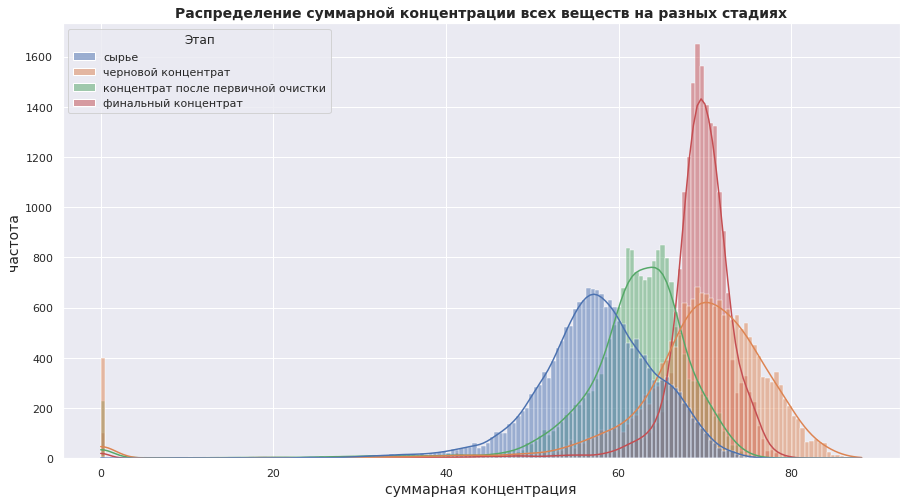

In [26]:
a = pd.concat(axis=0, ignore_index=True,
              objs=[pd.DataFrame.from_dict({'value': df['rougher.input.feed_total'], 'Этап': 'сырье'}),
                    pd.DataFrame.from_dict({'value': df['rougher.output.concentrate_total'], 'Этап': 'черновой концентрат'}),
                    pd.DataFrame.from_dict({'value': df['primary_cleaner.output.concentrate_total'], 'Этап': 'концентрат после первичной очистки'}),
                    pd.DataFrame.from_dict({'value': df['final.output.concentrate_total'], 'Этап': 'финальный концентрат'})])
plt.figure(figsize=(15,8));
sns.set(style='darkgrid')
sns.histplot(data=a, x="value", hue="Этап", kde=True)
plt.title('Распределение суммарной концентрации всех веществ на разных стадиях', fontsize=14, weight='bold');
plt.xlabel('суммарная концентрация', fontsize=14);
plt.ylabel('частота', fontsize=14);   

По графикам видно, что на каждом этапе очистки присутствует нулевая суммарная концентрация всех веществ, чего в реальности не может быть. Исключим такие случаи из выборок.

In [27]:
# соберем датасет с нулевым значением суммарной концентрации
delete = df[(df['rougher.input.feed_total'] == 0) | (df['rougher.output.concentrate_total'] == 0) |
            (df['primary_cleaner.output.concentrate_total'] == 0) | (df['final.output.concentrate_total'] == 0)]

In [28]:
# перезапишем train и test, удалив строки с нулевыми значениями суммарной концентрации
train = train.query('index not in @delete.index')
test = test.query('index not in @delete.index')

## Модель

**sMAPE** (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).

$$
sMAPE = \frac{1}{N} \sum_{i = 1}^{N} \frac{|y_{i} - ŷ_{i}|}{(|y_{i}| + |ŷ_{i}|) / 2} × 100\text{%}
$$

- $y_{i}$ - значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество.
- $ŷ_{i}$ - значение предсказания для объекта с порядковым номером i, например, в тестовой выборке.
- $N$ - количество объектов в выборке.

Нужно спрогнозировать сразу две величины:
- эффективность обогащения чернового концентрата `rougher.output.recovery`;
- эффективность обогащения финального концентрата `final.output.recovery`.

Итоговая метрика складывается из двух величин:


$$
sMAPE\text{ (итог)} = 25\text{%} × sMAPE(rougher) + 75\text{%} × sMAPE(final)
$$

In [29]:
# функция для расчета sMAPE
def sMAPE(target, predictions):
    return np.mean(abs(target - predictions) / ((abs(target) + abs(predictions)) / 2))

In [30]:
# функция для расчета итоговой sMAPE
def sMAPE_total(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

In [31]:
# разделение обучающей и тестовой выборок на признаки и целевые признаки
train = train.dropna().reset_index(drop=True)
test = test.dropna().reset_index(drop=True)

features_train = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_rougher = train['rougher.output.recovery']
target_train_final = train['final.output.recovery']

features_test = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_rougher = test['rougher.output.recovery']
target_test_final = test['final.output.recovery']

Обучим несколько моделей, чтобы выбрать модель с наименьшим значением ошибки sMAPE. Чтобы применить сценарий для обработки данных, содержащий стандартизацию признаков, отбор признаков применим функцию ***make_pipeline()***. Для отбора гипермараметров применим функцию **GridSearchCV()**.

Для сравнения также обучим простую модель DummyRegressor.

In [32]:
# функция для определения гиперпараметров моделей для предсказания rougher.output.recovery и final.output.recovery
def grid_search(models, parametrs):
    params_rougher, params_final = [], []
    scorer = make_scorer(sMAPE, greater_is_better=False)

    for clf in models:
        grid = GridSearchCV(clf, parametrs, cv=5, scoring=scorer)
        
        grid.fit(features_train, target_train_rougher)
        params_rougher.append(grid.best_params_)
    
        grid.fit(features_train, target_train_final)
        params_final.append(grid.best_params_)
    
    print("\033[1m" + 'Гиперпараметры для rougher:' + "\033[0;0m", params_rougher)
    print("\033[1m" + 'Гиперпараметры для final:' + "\033[0;0m", params_final)

In [33]:
# функция для подбора комбинации моделей на кроссвалидации обучающей выборки с наименьшей sMAPE
def train_result_combination(models_rougher, models_final):
    scorer = make_scorer(sMAPE, greater_is_better=False) # greater_is_better=False минимизация метрики
    best_result = 1
    best_model_rougher = None
    best_model_final = None
    
    for model_rougher in models_rougher:
        for model_final in models_final:
            smape_rougher = cross_val_score(model_rougher, features_train, target_train_rougher, scoring=scorer, cv=5).mean()
            smape_final = cross_val_score(model_final, features_train, target_train_final, scoring=scorer, cv=5).mean()
            
            result = sMAPE_total(smape_rougher, smape_final)
            
            if abs(result) < best_result:
                best_model_rougher = model_rougher
                best_model_final = model_final
                best_result = abs(result)
    
    print("\033[1m" + 'Лучшая модель для rougher:' + "\033[0;0m", best_model_rougher)
    print("\033[1m" + 'Лучшая модель для final:' + "\033[0;0m", best_model_final)
    print("\033[1m" + "Итоговая sMAPE на обучающей выборке: {:.1%}".format(best_result) + "\033[0;0m")

In [34]:
# функция для вывода итоговой sMAPE по тестовой выборке
def test_result(model_rougher, model_final):
    model_rougher.fit(features_train, target_train_rougher)
    predictions_rougher = model_rougher.predict(features_test)
    smape_rougher = sMAPE(target_test_rougher, predictions_rougher)

    model_final.fit(features_train, target_train_final)
    predictions_final = model_final.predict(features_test)
    smape_final = sMAPE(target_test_final, predictions_final)

    print("\033[1m" + "Итоговая sMAPE на тестовой выборке: {:.1%}".format(sMAPE_total(smape_rougher, smape_final)) +"\033[0;0m")

### DummyRegressor (Простая модель)

In [35]:
dummy = DummyRegressor(strategy="median")
train_result_combination(models_rougher = [dummy],
                         models_final = [dummy])
test_result(dummy, dummy)

Лучшая модель для rougher: DummyRegressor(strategy='median')
Лучшая модель для final: DummyRegressor(strategy='median')
Итоговая sMAPE на обучающей выборке: 9.2%
Итоговая sMAPE на тестовой выборке: 7.3%


### Lasso

In [36]:
model_1 = make_pipeline(Lasso(random_state=123))

model_2 = make_pipeline(StandardScaler(), SelectFromModel(estimator=LinearRegression()), Lasso(random_state=123))

model_3 = make_pipeline(SelectFromModel(estimator=LinearRegression()), Lasso(random_state=123))

In [37]:
%%time
train_result_combination(models_rougher = [model_1, model_2, model_3],
                         models_final = [model_1, model_2, model_3])

Лучшая модель для rougher: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LinearRegression())),
                ('lasso', Lasso(random_state=123))])
Лучшая модель для final: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=LinearRegression())),
                ('lasso', Lasso(random_state=123))])
Итоговая sMAPE на обучающей выборке: 8.3%
CPU times: user 31.8 s, sys: 31.4 s, total: 1min 3s
Wall time: 1min 3s


### Ridge

In [38]:
model_4 = make_pipeline(Ridge(random_state=123))

model_5 = make_pipeline(StandardScaler(), SelectFromModel(estimator=LinearRegression()), Ridge(random_state=123))

model_6 = make_pipeline(SelectFromModel(estimator=LinearRegression()), Ridge(random_state=123))

In [39]:
%%time
train_result_combination(models_rougher = [model_4, model_5, model_6],
                         models_final = [model_4, model_5, model_6])

Лучшая модель для rougher: Pipeline(steps=[('selectfrommodel',
                 SelectFromModel(estimator=LinearRegression())),
                ('ridge', Ridge(random_state=123))])
Лучшая модель для final: Pipeline(steps=[('selectfrommodel',
                 SelectFromModel(estimator=LinearRegression())),
                ('ridge', Ridge(random_state=123))])
Итоговая sMAPE на обучающей выборке: 8.6%
CPU times: user 15.5 s, sys: 15 s, total: 30.5 s
Wall time: 30.4 s


### Catboost (Градиентный бустинг)

In [40]:
model_7 = make_pipeline(CatBoostRegressor(random_state=123))

model_8 = make_pipeline(StandardScaler(), CatBoostRegressor(random_state=123))

model_9 = make_pipeline(StandardScaler(),
                      SelectFromModel(estimator=RandomForestRegressor(n_estimators=10, random_state=123)),
                      CatBoostRegressor(random_state=123))

In [41]:
%%time
grid_search(models=[model_7, model_8, model_9], parametrs={'catboostregressor__iterations': range (1, 6)})

Learning rate set to 0.5
0:	learn: 5.4797990	total: 85.6ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 5.8951446	total: 27.5ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 6.4107100	total: 27.8ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 6.1155235	total: 26.4ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 5.9319734	total: 26.3ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 5.4797990	total: 26.3ms	remaining: 26.3ms
1:	learn: 4.8349056	total: 51ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 5.8951446	total: 26.3ms	remaining: 26.3ms
1:	learn: 5.1267495	total: 99.1ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 6.4107100	total: 25.3ms	remaining: 25.3ms
1:	learn: 5.5926368	total: 50.1ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 6.1155235	total: 26ms	remaining: 26ms
1:	learn: 5.4053663	total: 51.3ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 5.9319734	total: 25.3ms	remaining: 25.3ms
1:	learn: 5.2263909	total: 51.3ms	remaining: 0us
Learni

Запишем модели с вычисленными гиперпараметрами

In [42]:
cb_rougher_1 = CatBoostRegressor(random_state=123, iterations=5)

cb_rougher_2 = make_pipeline(StandardScaler(), CatBoostRegressor(random_state=123, iterations=5))

cb_rougher_3 = make_pipeline(StandardScaler(),
                      SelectFromModel(estimator=RandomForestRegressor(n_estimators=10, random_state=123)),
                      CatBoostRegressor(random_state=123, iterations=5))


cb_final_1 = CatBoostRegressor(random_state=123, iterations=3)

cb_final_2 = make_pipeline(StandardScaler(), CatBoostRegressor(random_state=123, iterations=5))

cb_final_3 = make_pipeline(StandardScaler(),
                      SelectFromModel(estimator=RandomForestRegressor(n_estimators=10, random_state=123)),
                      CatBoostRegressor(random_state=123, iterations=4))

In [43]:
%%time
train_result_combination(models_rougher = [cb_rougher_1, cb_rougher_2, cb_rougher_3],
                         models_final = [cb_final_1, cb_final_2, cb_final_3])

Learning rate set to 0.5
0:	learn: 5.4797990	total: 26.8ms	remaining: 107ms
1:	learn: 4.8349056	total: 53.2ms	remaining: 79.7ms
2:	learn: 4.4255966	total: 79.5ms	remaining: 53ms
3:	learn: 4.2119049	total: 106ms	remaining: 26.5ms
4:	learn: 4.0657639	total: 131ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 5.8951446	total: 26.7ms	remaining: 107ms
1:	learn: 5.1267495	total: 51ms	remaining: 76.5ms
2:	learn: 4.7995267	total: 73.8ms	remaining: 49.2ms
3:	learn: 4.5459771	total: 97.4ms	remaining: 24.4ms
4:	learn: 4.3694507	total: 121ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 6.4107100	total: 25.2ms	remaining: 101ms
1:	learn: 5.5926368	total: 50ms	remaining: 75ms
2:	learn: 5.1987409	total: 74.9ms	remaining: 49.9ms
3:	learn: 4.9525287	total: 99ms	remaining: 24.8ms
4:	learn: 4.7079771	total: 123ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 6.1155235	total: 25.8ms	remaining: 103ms
1:	learn: 5.4053663	total: 51.4ms	remaining: 77.1ms
2:	learn: 5.0219614	total: 77.1ms	remaining

### Decision Tree Regressor (Регрессор дерева решения)

In [44]:
model_10 = make_pipeline(DecisionTreeRegressor(random_state=123))

model_11 = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=123))

model_12 = make_pipeline(StandardScaler(),
                      SelectFromModel(estimator=RandomForestRegressor(n_estimators=10, random_state=123)),
                      DecisionTreeRegressor(random_state=123))

In [45]:
%%time
grid_search(models=[model_10, model_11, model_12], parametrs={'decisiontreeregressor__max_depth': range (1, 6)})

Гиперпараметры для rougher: [{'decisiontreeregressor__max_depth': 5}, {'decisiontreeregressor__max_depth': 5}, {'decisiontreeregressor__max_depth': 4}]
Гиперпараметры для final: [{'decisiontreeregressor__max_depth': 1}, {'decisiontreeregressor__max_depth': 1}, {'decisiontreeregressor__max_depth': 1}]
CPU times: user 5min 3s, sys: 0 ns, total: 5min 3s
Wall time: 5min 8s


In [46]:
dtr_rougher_1 = DecisionTreeRegressor(random_state=123, max_depth=5)

dtr_rougher_2 = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=123, max_depth=5))

dtr_rougher_3 = make_pipeline(StandardScaler(),
                      SelectFromModel(estimator=RandomForestRegressor(n_estimators=10, random_state=123)),
                      DecisionTreeRegressor(random_state=123, max_depth=4))


dtr_final_1 = DecisionTreeRegressor(random_state=123, max_depth=1)

dtr_final_2 = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=123, max_depth=1))

dtr_final_3 = make_pipeline(StandardScaler(),
                      SelectFromModel(estimator=RandomForestRegressor(n_estimators=10, random_state=123)),
                      DecisionTreeRegressor(random_state=123, max_depth=1))

In [47]:
%%time
train_result_combination(models_rougher = [dtr_rougher_1, dtr_rougher_2, dtr_rougher_3],
                         models_final = [dtr_final_1, dtr_final_2, dtr_final_3])

Лучшая модель для rougher: DecisionTreeRegressor(max_depth=5, random_state=123)
Лучшая модель для final: DecisionTreeRegressor(max_depth=1, random_state=123)
Итоговая sMAPE на обучающей выборке: 8.3%
CPU times: user 2min 51s, sys: 0 ns, total: 2min 51s
Wall time: 2min 53s


**CatBoostRegressor** имеет лучшие показатели на кроссвалидации **sMAPE = 7.8%**, этот показатель меньше, чем у простой модели, значит алгоритм работает точнее. Протестируем модели.

Лучшая модель для rougher:
- **cb_rougher_2 = make_pipeline(StandardScaler(), CatBoostRegressor(random_state=123, iterations=5))***

Лучшая модель для final:
- **cb_final_3 = make_pipeline(StandardScaler(), SelectFromModel(estimator=RandomForestRegressor(n_estimators=10, random_state=123)), CatBoostRegressor(random_state=123, iterations=3))**

### Проверка лучшей модели на тестовой выборке

In [48]:
test_result(cb_rougher_2, cb_final_3)

Learning rate set to 0.5
0:	learn: 6.0187447	total: 28.2ms	remaining: 113ms
1:	learn: 5.3033151	total: 56.8ms	remaining: 85.2ms
2:	learn: 4.9650671	total: 83.5ms	remaining: 55.7ms
3:	learn: 4.7449895	total: 111ms	remaining: 27.8ms
4:	learn: 4.5642653	total: 138ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 7.4906551	total: 7.76ms	remaining: 23.3ms
1:	learn: 7.0147447	total: 14.6ms	remaining: 14.6ms
2:	learn: 6.7697015	total: 21.2ms	remaining: 7.07ms
3:	learn: 6.6412564	total: 27.8ms	remaining: 0us
Итоговая sMAPE на тестовой выборке: 6.7%


## Общий вывод

В ходе проекта были исследованы данные с параметрами добычи и очистки золотосодержащей руды. Данные были представлены в трех файлах: обучающая выборка, тестовая выборка, исходные данные.

На этапе **подготовки данных** была проведена проверка корректности расчета эффективности обогращения. Согласно проведенным рассчетам был сделан вывод, что эффективность обогращения в исходных данных рассчитана корректно.

Далее был проведен анализ признаков, недоступных в тестовой выборке. Было выявлено 34 таких признака, которые были восстановлены в тестовой выборке из исходных данных.

На этапе **анализа данных** было рассмотрено изменение концентрации металлов на различных этапах очистки сырья. Было установлено, что концентрация золота увеличивается после каждого этапа очистки, концентрация серебра  уменьшается после каждого этапа, концентрация свинца увеличивается после первичной очистки и почти не изменяется после вторичной. 

Далее сравнили распределения размеров гранул сырья на обучающей и тестовой выборках. Оказалось, что на этапе флотации распределения размеров гранул сырья на обучающей и тестовой выборках довольно сильно отличаются. Во избежание неправильных оценок модели, признак `rougher.input.feed_size` был исключен из обеих выборок.

Также на данном этапе была исследована суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Было установлено, что концентрация металлов с каждым этапом очистки увеличивается, при этом разброс значений концентраций уменьшается. Концентрация сольвента (растворителя), наоборот, с каждым этапом очистки уменьшается, разброс значений концентраций также уменьшается.

В **п.4** была составлена функция для расчета итогового показателя качества модели - метрики sMAPE (симметричное среднее абсолютное процентное отклонение). Для предсказания значений эффективности обогращения было использовано несколько моделей: **Lasso, Ridge, CatBoostRegressor, DecisionTreeRegressor**. Для каждой модели было составлено по 3 сценария с различными комбинациями функций (стандартизация признаков, отбор признаков), для моделей CatBoostRegressor, DecisionTreeRegressor дополнительно были отобраны значения гиперпараметров. 

Лучшие результаты на кроссвалидации показала модель **CatBoostRegressor**. Итоговая sMAPE на тестовой выборке составила **6,7%**.